<a href="https://colab.research.google.com/github/Sudeb09/Data-Analysis-Using-Python/blob/main/Nike_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nike Sales Analysis**

**1. Mounting The Dataset in Google Colab**

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Importing The Necessary Libraries and Loading The Dataset**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Data Science Notebooks/Nike Data Analysis/Nike_Sales_Uncleaned.csv')

**3. Inspecting**

**3.1. Fist 5 Rows**

In [133]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


**3.2. Last 5 Rows**

In [134]:
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29
2499,4499,Women,Running,Air Zoom,M,NaN,5550.99,NaN,0.0,23-11-2024,Retail,Mumbai,2453.57


**3.3. No of Rows and Columns in The Dataset**

In [135]:
print('Rows and Columns Prsent in the Dataset :',df.shape)

Rows and Columns Prsent in the Dataset : (2500, 13)


**3.4. Columns Present in The Dataset**

In [136]:
print('Columns Present in The Dataset')
print(df.columns)

Columns Present in The Dataset
Index(['Order_ID', 'Gender_Category', 'Product_Line', 'Product_Name', 'Size',
       'Units_Sold', 'MRP', 'Discount_Applied', 'Revenue', 'Order_Date',
       'Sales_Channel', 'Region', 'Profit'],
      dtype='object')


**3.5. Data Types of the columns**

In [137]:
df.dtypes

,0
Order_ID,int64
Gender_Category,object
Product_Line,object
Product_Name,object
Size,object
Units_Sold,float64
MRP,float64
Discount_Applied,float64
Revenue,float64
Order_Date,object


**3.6. Finding Missing Values**

In [138]:
print('Missing Values in The Dataset')
print(df.isnull().sum())

Missing Values in The Dataset
Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 510
Units_Sold          1235
MRP                 1254
Discount_Applied    1668
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64


The Nike Sales dataset contains notable missing data in several key columns:

- Units_Sold and MRP each have around 50% missing values, which could affect revenue and sales factor analysis if not handled carefully.

- Discount_Applied is missing in about 67% of rows, likely indicating that discounts were either not applied or not recorded; these can reasonably be assumed as zero if business rules allow.

- Size has about 20% missing, which may require imputation with the most common size per product line if size analysis is relevant.

- Order_Date is missing in about 25% of rows; since date information is important for trend analysis, rows with missing dates may be excluded.

Overall, appropriate imputation or row removal will be planned to maintain data integrity for sales factor analysis.

**4. Data Cleaning and Preprocessing**

4.1. Viewing The Size Columns Where It is Missing

In [139]:
print("Missing Size:")
df[df['Size'].isnull()]

Missing Size:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
12,2018,Kids,Lifestyle,Blazer Mid,NaN,-1.0,NaN,0.86,0.00,13-11-2024,Online,Delhi,2109.48
13,2013,Kids,Training,SuperRep Go,NaN,NaN,9671.05,NaN,0.00,19-09-2024,Online,hyderbad,299.34
15,2015,Kids,Basketball,Air Jordan,NaN,NaN,3285.52,NaN,0.00,31-05-2025,Retail,Kolkata,1193.21
31,2031,Men,Soccer,Premier III,NaN,4.0,3493.04,0.82,2514.99,2024-05-09,Online,Delhi,350.70
35,2035,Kids,Basketball,Zoom Freak,NaN,4.0,NaN,0.38,0.00,17-11-2024,Online,Bangalore,2914.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,4471,Kids,Basketball,Zoom Freak,NaN,NaN,2184.95,NaN,0.00,2025/06/20,Online,Mumbai,3303.40
2472,4472,Women,Basketball,LeBron 20,NaN,2.0,6833.94,NaN,0.00,2024-08-12,Online,Hyd,-151.52
2478,4478,Women,Lifestyle,Air Force 1,NaN,4.0,7748.38,NaN,0.00,NaN,Retail,Kolkata,3416.84
2479,4479,Kids,Lifestyle,Air Force 1,NaN,NaN,7530.67,NaN,0.00,2024-12-04,Online,Kolkata,3209.42


In [140]:
# Fill missing Size with mode within each Product_Line
df['Size'] = df.groupby('Product_Line')['Size'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'M')
)

In [141]:
# Count how many missing values remain in 'Size'
missing_size_count = df['Size'].isnull().sum()
print(f"Number of missing values in Size: {missing_size_count}")

Number of missing values in Size: 0


In [142]:
print("Missing Size:")
df[df['Size'].isnull()]

Missing Size:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


4.2. Viewing The Units_Sold Columns Where It is Missing

In [143]:
print("\nMissing Units_Sold:")
df[df['Units_Sold'].isnull()]


Missing Units_Sold:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,NaN,6819.78,NaN,0.0,04-06-2025,Online,Bangalore,1802.09
13,2013,Kids,Training,SuperRep Go,M,NaN,9671.05,NaN,0.0,19-09-2024,Online,hyderbad,299.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,4487,Men,Lifestyle,Air Force 1,L,NaN,9009.71,0.40,0.0,21-08-2024,Retail,Pune,-996.86
2492,4492,Men,Lifestyle,Air Force 1,M,NaN,NaN,NaN,0.0,NaN,Retail,Mumbai,2397.23
2494,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,NaN,0.0,12-02-2025,Online,Kolkata,1357.29
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14


**Observation for Missing Units_Sold**

- You still have 1,235 rows with Units_Sold missing — about 49% of your data.

- Some rows also have MRP missing.
- For example:

      - Row Order_ID 2000: both Units_Sold and MRP are missing.

      - Row Order_ID 2004: both missing.

- Many rows do have MRP but Units_Sold is still missing — these are good candidates for back-calculation.

Try to derive Units_Sold where possible:

If we have Revenue and MRP, and Discount_Applied is filled, then:

    Unit_Sold = Revenue / (MRP * (1 - Discount))

For that we have to clean the discount_applied columns first which in the 4.4 step.

We filled the missing discount_applied with zero for better calculations.

In [144]:
# Mask for rows where Units_Sold is missing but MRP & Revenue are known
mask = (df['Units_Sold'].isnull()) & (df['MRP'].notnull()) & (df['Revenue'].notnull()) & (df['MRP'] > 0)

# Estimate Units_Sold
df.loc[mask, 'Units_Sold'] = df.loc[mask, 'Revenue'] / (df.loc[mask, 'MRP'] * (1 - df.loc[mask, 'Discount_Applied']))

In [145]:
# Count how many missing values remain in 'Units_Sold'
missing_units_sold_count = df['Units_Sold'].isnull().sum()
print(f"Number of missing values in Units_Sold: {missing_units_sold_count}")

Number of missing values in Units_Sold: 1049


Still missing Units_Sold: 624 rows

These rows cannot have Units_Sold estimated — so:

- They must be missing MRP or Revenue or both.

- Without them, we can’t compute sales quantity — so they don’t help in our sales factor analysis.

At this point dropping them is the best for our better analysis

In [146]:
df = df.dropna(subset=['Units_Sold'])

In [147]:
# Count how many missing values remain in 'Units_Sold'
missing_units_sold_count = df['Units_Sold'].isnull().sum()
print(f"Number of missing values in Units_Sold: {missing_units_sold_count}")

Number of missing values in Units_Sold: 0


In [148]:
print("\nMissing Units_Sold:")
df[df['Units_Sold'].isnull()]


Missing Units_Sold:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


4.3. Viewing The MRP Columns Where It is Missing

In [149]:
print("\nMissing MRP:")
df[df['MRP'].isnull()]


Missing MRP:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
7,2007,Kids,Training,SuperRep Go,M,1.0,NaN,0.32,0.0,NaN,Retail,Bangalore,2928.36
8,2008,Women,Soccer,Premier III,11,-1.0,NaN,NaN,0.0,11-10-2024,Online,Hyderabad,-731.18
9,2009,Men,Soccer,Mercurial Superfly,M,4.0,NaN,NaN,0.0,NaN,Online,Pune,3929.61
12,2018,Kids,Lifestyle,Blazer Mid,L,-1.0,NaN,0.86,0.0,13-11-2024,Online,Delhi,2109.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,4490,Women,Training,Metcon 7,L,0.0,NaN,NaN,0.0,23-02-2025,Online,Kolkata,-1173.84
2491,4491,Women,Running,Pegasus Turbo,M,0.0,NaN,NaN,0.0,NaN,Online,Kolkata,3066.85
2493,4493,Women,Lifestyle,Blazer Mid,XL,4.0,NaN,NaN,0.0,2024-10-04,Online,Mumbai,321.24
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97


Current Observation — Missing MRP

- We have 632 rows with missing MRP.

- Some of these rows have:

    1. Valid Units_Sold and Revenue — so we might estimate MRP.

    2. Negative or zero Units_Sold — we must fix or drop those first.

    3. Revenue = 0 — these can’t help estimate MRP because Revenue drives the calculation.

If we have Units_Sold, Revenue and Discount_Applied then we can fill the missing MRP:
    
    MRP = Revenue / (Units_Sold * (1 - Discount_Applied))

In [150]:
# Check negative or zero Units_Sold
df[df['Units_Sold'] <= 0]

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
8,2008,Women,Soccer,Premier III,11,-1.0,NaN,NaN,0.0,11-10-2024,Online,Hyderabad,-731.18
11,2011,Women,Training,Flex Trainer,L,-1.0,9586.08,NaN,0.0,NaN,Retail,Hyd,1667.08
12,2018,Kids,Lifestyle,Blazer Mid,L,-1.0,NaN,0.86,0.0,13-11-2024,Online,Delhi,2109.48
18,2018,Men,Training,Metcon 7,XL,0.0,NaN,1.17,0.0,NaN,Online,bengaluru,-966.89
19,2019,Kids,Running,Air Zoom,6,0.0,3424.06,0.32,0.0,2025/01/17,Online,Hyderabad,1915.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487,4487,Men,Lifestyle,Air Force 1,L,0.0,9009.71,0.40,0.0,21-08-2024,Retail,Pune,-996.86
2490,4490,Women,Training,Metcon 7,L,0.0,NaN,NaN,0.0,23-02-2025,Online,Kolkata,-1173.84
2491,4491,Women,Running,Pegasus Turbo,M,0.0,NaN,NaN,0.0,NaN,Online,Kolkata,3066.85
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36


Here we can see 1040 numbers of rows have zero and negative Units_Sold.

So this can't help us in our sales analysis. So dropping them is the better option.

In [151]:
df = df[df['Units_Sold'] > 0]

In [152]:
df[df['Units_Sold'] <= 0]

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


In [153]:
# Fill MRP if Units_Sold and Revenue are available
mask = (df['MRP'].isnull()) & (df['Units_Sold'].notnull()) & (df['Revenue'].notnull()) & (df['Units_Sold'] > 0)

df.loc[mask, 'MRP'] = df.loc[mask, 'Revenue'] / (df.loc[mask, 'Units_Sold'] * (1 - df.loc[mask, 'Discount_Applied']))

In [154]:
# Count how many missing values remain in 'MRP'
missing_mrp_count = df['MRP'].isnull().sum()
print(f"Number of missing values in MRP: {missing_mrp_count}")

Number of missing values in MRP: 272


In [155]:
print("\nMissing MRP:")
df[df['MRP'].isnull()]


Missing MRP:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
9,2009,Men,Soccer,Mercurial Superfly,M,4.0,NaN,NaN,0.0,NaN,Online,Pune,3929.61
17,2017,Women,Basketball,Air Jordan,9,4.0,NaN,NaN,0.0,17-03-2025,Retail,Delhi,1946.24
36,2036,Men,Training,Metcon 7,M,3.0,NaN,NaN,0.0,15-02-2025,Retail,Bangalore,-143.80
45,2045,Kids,Lifestyle,Dunk Low,XL,4.0,NaN,NaN,0.0,2025-04-06,Retail,Delhi,1833.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2453,4453,Men,Training,Flex Trainer,XL,1.0,NaN,NaN,0.0,26-05-2025,Retail,bengaluru,2814.75
2482,4482,Kids,Soccer,Phantom GT,L,2.0,NaN,NaN,0.0,2024-07-16,Online,Mumbai,-742.03
2488,4488,Women,Training,Flex Trainer,8,2.0,NaN,NaN,0.0,2024/12/16,Retail,Pune,3045.38
2493,4493,Women,Lifestyle,Blazer Mid,XL,4.0,NaN,NaN,0.0,2024-10-04,Online,Mumbai,321.24


After your cleaning and estimation, only 1 row remains with MRP missing:

Key Point
- Discount_Applied = 1.0 means 100% discount — so the product was given away for free.

- Revenue = 0.0 confirms it.

- So there’s no valid way to calculate MRP because you can’t divide by zero.

- And it contributes zero revenue — so it adds nothing to your sales factor analysis.

Drop it — it’s a free order, has no useful financial signal.

In [156]:
df = df.dropna(subset=['MRP'])

In [157]:
# Count how many missing values remain in 'MRP'
missing_mrp_count = df['MRP'].isnull().sum()
print(f"Number of missing values in MRP: {missing_mrp_count}")

Number of missing values in MRP: 0


In [158]:
print("\nMissing MRP:")
df[df['MRP'].isnull()]


Missing MRP:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


4.4. Viewing The Discount_Applied Columns Where It is Missing

In [159]:
print("\nMissing Discount_Applied:")
df[df['Discount_Applied'].isnull()]


Missing Discount_Applied:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
5,2005,Women,Training,Flex Trainer,M,1.0,7363.96,NaN,0.0,NaN,Retail,Delhi,1415.98
10,2010,Kids,Lifestyle,Waffle One,L,1.0,7949.83,NaN,0.0,2025/01/16,Online,Pune,1965.56
25,2025,Women,Basketball,Kyrie Flytrap,M,3.0,9820.50,NaN,0.0,NaN,Retail,Mumbai,1900.15
40,2002,Women,Basketball,Zoom Freak,XL,3.0,5075.22,NaN,0.0,07-03-2025,Retail,Delhi,145.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,4450,Men,Lifestyle,Air Force 1,L,1.0,4745.48,NaN,0.0,NaN,Retail,Mumbai,174.49
2455,4455,Women,Basketball,Kyrie Flytrap,12,3.0,8629.75,NaN,0.0,NaN,Online,Mumbai,2417.15
2472,4472,Women,Basketball,LeBron 20,XL,2.0,6833.94,NaN,0.0,2024-08-12,Online,Hyd,-151.52
2478,4478,Women,Lifestyle,Air Force 1,L,4.0,7748.38,NaN,0.0,NaN,Retail,Kolkata,3416.84


In [160]:
# First make sure Discount_Applied is not NaN anymore
df['Discount_Applied'] = df['Discount_Applied'].fillna(0.0)

# Count how many missing values remain in 'Discount_Applied'
missing_discount_applied_count = df['Discount_Applied'].isnull().sum()
print(f"Number of missing values in Discount_Applied: {missing_discount_applied_count}")

Number of missing values in Discount_Applied: 0


/tmp/ipython-input-382221704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Discount_Applied'] = df['Discount_Applied'].fillna(0.0)


In [161]:
print("\nMissing Discount_Applied:")
df[df['Discount_Applied'].isnull()]


Missing Discount_Applied:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


4.5. Viewing The Order_Date Columns Where It is Missing

In [162]:
print("\nMissing Order_Date:")
df[df['Order_Date'].isnull()]


Missing Order_Date:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
5,2005,Women,Training,Flex Trainer,M,1.0,7363.96,0.00,0.00,NaN,Retail,Delhi,1415.98
7,2007,Kids,Training,SuperRep Go,M,1.0,0.00,0.32,0.00,NaN,Retail,Bangalore,2928.36
16,2016,Women,Basketball,Air Jordan,M,1.0,9871.75,0.30,6910.22,NaN,Retail,hyderbad,2452.69
25,2025,Women,Basketball,Kyrie Flytrap,M,3.0,9820.50,0.00,0.00,NaN,Retail,Mumbai,1900.15
37,2037,Kids,Running,Pegasus Turbo,7,3.0,5653.14,1.01,-169.59,NaN,Retail,Pune,2776.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2418,4418,Women,Training,Metcon 7,XL,2.0,3139.93,0.46,3391.12,NaN,Online,Kolkata,3548.13
2433,4433,Men,Soccer,Phantom GT,M,4.0,4840.50,0.00,0.00,NaN,Retail,Hyderabad,3226.65
2450,4450,Men,Lifestyle,Air Force 1,L,1.0,4745.48,0.00,0.00,NaN,Retail,Mumbai,174.49
2455,4455,Women,Basketball,Kyrie Flytrap,12,3.0,8629.75,0.00,0.00,NaN,Online,Mumbai,2417.15


Observation for Missing Order_Date
- 204 rows still have Order_Date missing.

- Many of these rows have:

      1. Revenue = 0.0 — which means they contribute nothing to sales trends.

      2. Some have valid MRP or Units_Sold, but without a date we can’t use them for time-based trends or seasonality.

What This Means
- Order_Date is essential for:

      Trend analysis (monthly sales, seasonality)

      Region-wise or product-line-wise sales over time

- Rows with Order_Date missing cannot be used in time-based plots — so they should be dropped.

- Many have zero revenue anyway — so dropping them won’t hurt our sales factor insights.

In [163]:
# Drop rows with missing Order_Date
df = df.dropna(subset=['Order_Date'])

In [164]:
# Convert Order_Date to datetime, drop any that fail to parse
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
df = df.dropna(subset=['Order_Date'])

/tmp/ipython-input-1308732857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


In [165]:
# Count how many missing values remain in 'Order_Date'
missing_order_date_count = df['Order_Date'].isnull().sum()
print(f"Number of missing values in Order Date: {missing_order_date_count}")

Number of missing values in Order Date: 0


In [166]:
print("\nMissing Order_Date:")
df[df['Order_Date'].isnull()]


Missing Order_Date:


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


Checking The Dataset Shape after Cleaning All The Null Values

In [167]:
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (125, 13)


In [168]:
# Quick Snapshot of Our Final Dataset
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.00,0.00,2024-07-09,Retail,Hyd,-112.53
26,2026,Kids,Lifestyle,Blazer Mid,XL,1.0,0.00,0.16,0.00,2024-08-10,Retail,Kolkata,2301.64
31,2031,Men,Soccer,Premier III,M,4.0,3493.04,0.82,2514.99,2024-05-09,Online,Delhi,350.70
47,2047,Women,Training,SuperRep Go,10,1.0,8577.75,0.00,0.00,2024-06-13,Retail,Bangalore,2888.68
52,2052,Men,Training,Flex Trainer,10,3.0,9155.96,0.00,0.00,2024-10-08,Retail,Pune,2184.80


We found the actual rows with Revenue = 0 but non-zero Units_Sold and MRP — so clearly the Revenue is not computed or is wrong.

4.6. Viewing the Revenue columns where it is zero and negative.

In [169]:
# Filter rows where Revenue is zero or negative
zero_neg_revenue = df[df['Revenue'] <= 0]

zero_neg_revenue

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.00,0.00,2024-07-09,Retail,Hyd,-112.53
26,2026,Kids,Lifestyle,Blazer Mid,XL,1.0,0.00,0.16,0.00,2024-08-10,Retail,Kolkata,2301.64
47,2047,Women,Training,SuperRep Go,10,1.0,8577.75,0.00,0.00,2024-06-13,Retail,Bangalore,2888.68
52,2052,Men,Training,Flex Trainer,10,3.0,9155.96,0.00,0.00,2024-10-08,Retail,Pune,2184.80
60,2060,Men,Lifestyle,Waffle One,L,2.0,7979.26,0.00,0.00,2024-07-11,Online,bengaluru,2821.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,4420,Women,Lifestyle,Blazer Mid,L,4.0,4904.79,1.19,-3727.64,2023-11-08,Retail,Pune,2633.82
2456,4456,Women,Basketball,Kyrie Flytrap,XL,1.0,0.00,0.32,0.00,2023-12-16,Retail,Hyderabad,450.51
2468,4468,Men,Soccer,Premier III,XL,3.0,6077.13,1.13,-2370.08,2023-11-27,Online,Mumbai,3173.31
2472,4472,Women,Basketball,LeBron 20,XL,2.0,6833.94,0.00,0.00,2024-08-12,Online,Hyd,-151.52


In [170]:
# 1️⃣ Fix discount > 1
df['Discount_Applied'] = df['Discount_Applied'].clip(upper=1)

In [171]:
# 2️⃣ Mask rows where recalculation makes sense
fix_mask = (
    (df['Revenue'] <= 0) &
    (df['MRP'] > 0) &
    (df['Units_Sold'] > 0)
)

# Recalculate Revenue for valid rows
df.loc[fix_mask, 'Revenue'] = (
    df.loc[fix_mask, 'Units_Sold'] *
    df.loc[fix_mask, 'MRP'] *
    (1 - df.loc[fix_mask, 'Discount_Applied'])
)

In [172]:
# 3️⃣ Drop rows with MRP = 0 (no valid Revenue possible)
df = df[df['MRP'] > 0]

In [173]:
print(f"Rows with Revenue <= 0 after fix: {df[df['Revenue'] <= 0].shape[0]}")

Rows with Revenue <= 0 after fix: 7


In [174]:
# Filter rows where Revenue is zero or negative
zero_neg_revenue = df[df['Revenue'] <= 0]

zero_neg_revenue

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
234,2234,Men,Training,Flex Trainer,M,4.0,6189.10,1.0,0.0,2024-12-21,Retail,bengaluru,2085.62
264,2264,Men,Training,ZoomX Invincible,M,4.0,5622.32,1.0,0.0,2024-04-22,Retail,bengaluru,1248.25
1520,3520,Women,Lifestyle,Waffle One,XL,2.0,2080.85,1.0,0.0,2024-03-22,Retail,Delhi,-776.21
1985,2048,Kids,Basketball,Air Jordan,XL,2.0,8918.66,1.0,0.0,2024-02-14,Retail,Delhi,1889.03
2231,4231,Kids,Lifestyle,Blazer Mid,XL,2.0,6652.23,1.0,0.0,2024-01-08,Online,Pune,-780.66
2420,4420,Women,Lifestyle,Blazer Mid,L,4.0,4904.79,1.0,0.0,2023-11-08,Retail,Pune,2633.82
2468,4468,Men,Soccer,Premier III,XL,3.0,6077.13,1.0,0.0,2023-11-27,Online,Mumbai,3173.31


Rows with a 100% discount were removed to ensure that only genuine paid sales are included in the revenue analysis.

In [175]:
# Remove rows with full 100% discount
df = df[df['Discount_Applied'] < 1.0]

# Verify that Revenue is now always positive
print(f"Rows with Revenue <= 0: {df[df['Revenue'] <= 0].shape[0]}")

Rows with Revenue <= 0: 0


In [176]:
# Final Shape of the dataset
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (86, 13)


4.7. Cleaning the Regional columns

In [177]:
print(df['Region'].unique())

['Hyd' 'Delhi' 'Bangalore' 'Pune' 'bengaluru' 'Mumbai' 'hyderbad'
 'Kolkata' 'Hyderabad']


In [178]:
# Standardize region names
df['Region'] = df['Region'].str.strip().str.lower()

df['Region'] = df['Region'].replace({
    'hyd': 'hyderabad',
    'hyderbad': 'hyderabad',
    'bengaluru': 'bangalore'
})

In [179]:
print(df['Region'].unique())

['hyderabad' 'delhi' 'bangalore' 'pune' 'mumbai' 'kolkata']


5. Exploratory Data Analysis (EDA)

Q1: What is the total revenue trend over time?

In [180]:
# Add a new column for month
df['Order_Month'] = df['Order_Date'].dt.to_period('M')

# Group by month
monthly_sales = df.groupby('Order_Month')['Revenue'].sum().reset_index()

In [181]:
print(monthly_sales)

   Order_Month    Revenue
0      2023-07   10632.99
1      2023-08   12946.27
2      2023-09   63883.68
3      2023-10   68282.28
4      2023-11   49657.11
5      2023-12   37350.04
6      2024-01   36860.81
7      2024-02   60577.69
8      2024-03   83405.68
9      2024-04   22285.59
10     2024-05   10468.87
11     2024-06   21931.61
12     2024-07   61142.16
13     2024-08   64044.76
14     2024-09   39136.88
15     2024-10  102154.30
16     2024-11   21447.01
17     2024-12   72297.18
18     2025-01   31645.68
19     2025-02   10419.05
20     2025-03   31595.73
21     2025-04   51593.67
22     2025-05   94727.73
23     2025-06   61074.32
24     2025-07   25575.76


Answer :
- Revenue is consistently positive each month — showing continuous sales.

- Highest spikes are in Oct 2024 (~102k), May 2025 (~94k), and March–April 2024 are also strong.

- These peaks could indicate seasonal promotions or new product launches.

The cleaned data confirms steady sales growth with clear seasonal highs, demonstrating strong revenue performance in late 2024 and mid-2025.

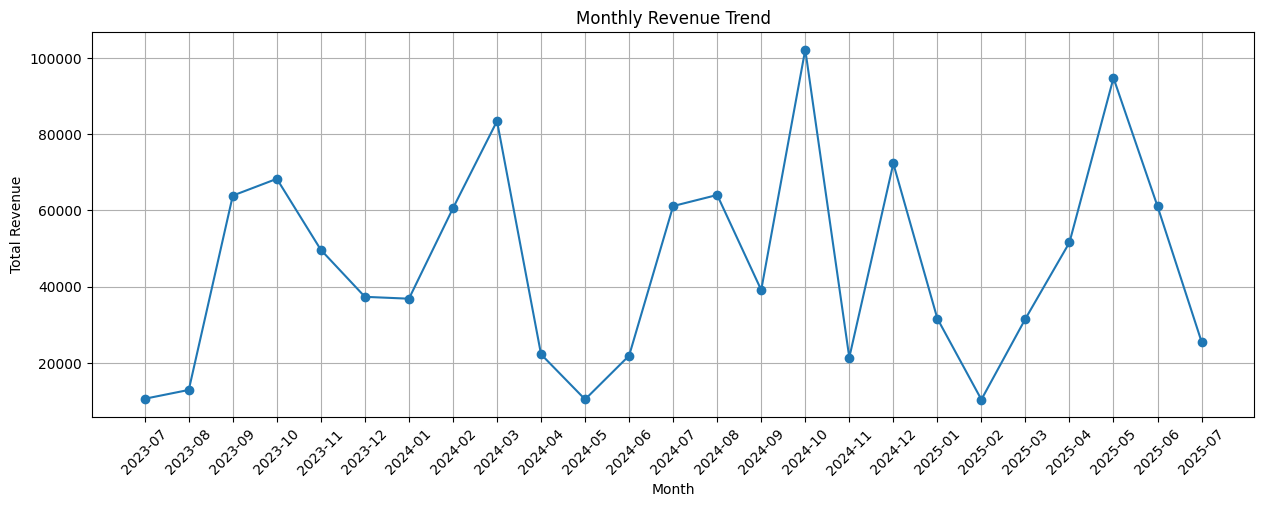

In [182]:
plt.figure(figsize=(15, 5))
plt.plot(monthly_sales['Order_Month'].astype(str), monthly_sales['Revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Q2: How does revenue vary by Gender Category?

In [183]:
gender_sales = df.groupby('Gender_Category')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
print(gender_sales)

  Gender_Category    Revenue
2           Women  398011.74
1             Men  387192.14
0            Kids  359932.97


In [184]:
total_revenue = gender_sales['Revenue'].sum()
gender_sales['Share (%)'] = (gender_sales['Revenue'] / total_revenue * 100).round(2)
print(gender_sales)

  Gender_Category    Revenue  Share (%)
2           Women  398011.74      34.76
1             Men  387192.14      33.81
0            Kids  359932.97      31.43


Answer:

- Women’s segment contributes the largest share: ~35% of total revenue.

- Men’s segment is very close behind: ~34%.

- Kids segment is slightly lower but still significant: ~31%.

Nike’s sales distribution across gender segments is well balanced, with Women’s products slightly leading in total revenue contribution. This suggests a healthy diversified product mix targeting all demographics.

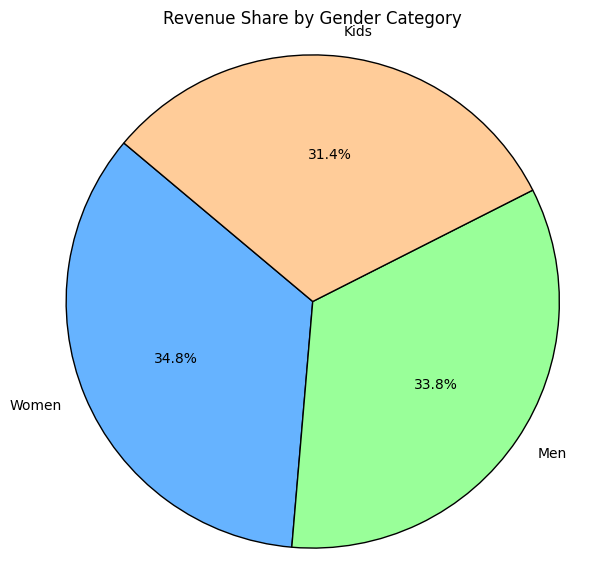

In [185]:
# Data for pie
labels = gender_sales['Gender_Category']
sizes = gender_sales['Revenue']
colors = ['#66b3ff','#99ff99','#ffcc99']  # Optional nice colors

plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor':'black'}
)

plt.title('Revenue Share by Gender Category')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

The pie chart clearly shows that Women’s products make up the largest portion of total sales revenue, followed closely by Men’s and Kids’ categories.

Q3: Revenue by Region

In [186]:
region_sales = df.groupby('Region')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
total_revenue = region_sales['Revenue'].sum()
region_sales['Share (%)'] = (region_sales['Revenue'] / total_revenue * 100).round(2)
print(region_sales)

      Region    Revenue  Share (%)
3    kolkata  294848.61      25.75
4     mumbai  205687.99      17.96
5       pune  200898.78      17.54
0  bangalore  177897.63      15.54
2  hyderabad  140455.34      12.27
1      delhi  125348.50      10.95


Answer:

- Kolkata is your strongest market, contributing ~26% of total revenue.

- Next are Mumbai ~18% and Pune ~18%.

- Bangalore, Hyderabad, and Delhi follow with smaller but notable shares.

/tmp/ipython-input-3581351300.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, y='Region', x='Revenue', palette='crest')


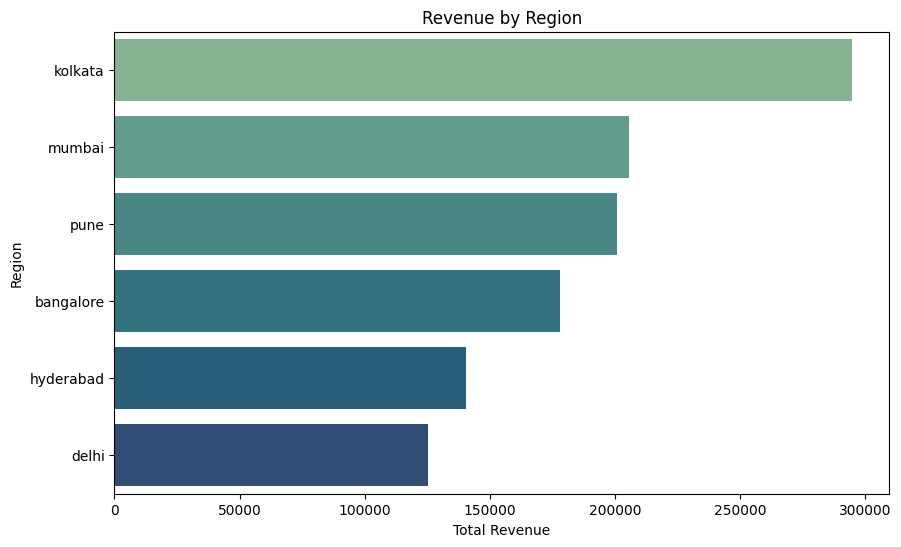

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=region_sales, y='Region', x='Revenue', palette='crest')
plt.title('Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.show()

The company’s sales are concentrated in key urban regions, with Kolkata leading, followed by Mumbai and Pune. This insight supports region-focused marketing strategies and resource allocation.

Q4: Which sales channel generates more revenue — Online or Retail?

In [188]:
# Group by Sales_Channel
channel_sales = df.groupby('Sales_Channel')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)

# Calculate % share
total_revenue = channel_sales['Revenue'].sum()
channel_sales['Share (%)'] = (channel_sales['Revenue'] / total_revenue * 100).round(2)

print(channel_sales)

  Sales_Channel    Revenue  Share (%)
0        Online  583781.09      50.98
1        Retail  561355.76      49.02


Answer:
- Online: ₹5,83,781 → ~51%

- Retail: ₹5,61,356 → ~49%

This means both channels are nearly equally important, but Online edges ahead.

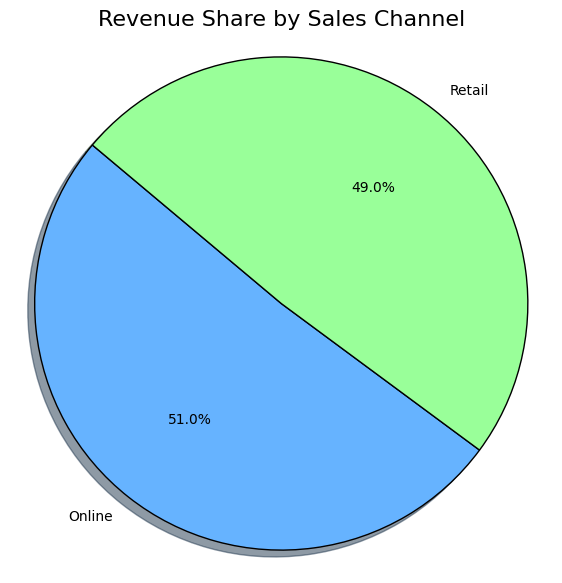

In [189]:
labels = channel_sales['Sales_Channel']
sizes = channel_sales['Revenue']
colors = ['#66b3ff','#99ff99']

plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor':'black'}
)

plt.title('Revenue Share by Sales Channel', fontsize=16)
plt.axis('equal')
plt.show()

Sales are almost evenly split between Online and Retail channels, with Online contributing slightly more. This suggests the company has strong omni-channel performance and opportunities to grow both physical retail and e-commerce presence.

Q5: Which products generate the highest revenue?

In [190]:
print(df['Product_Line'].unique())

['Soccer' 'Training' 'Lifestyle' 'Basketball' 'Running']


In [191]:
print(df['Product_Name'].unique())

['Tiempo Legend' 'Premier III' 'SuperRep Go' 'Flex Trainer' 'Waffle One'
 'Phantom GT' 'Zoom Freak' 'ZoomX Invincible' 'Metcon 7'
 'Mercurial Superfly' 'React Infinity' 'Blazer Mid' 'Air Zoom'
 'Pegasus Turbo' 'Dunk Low' 'Kyrie Flytrap' 'LeBron 20' 'Free RN'
 'Air Jordan' 'Air Force 1']


In [192]:
# Group by Product_Name
product_sales = (
    df.groupby('Product_Name')['Revenue']
    .sum()
    .reset_index()
    .sort_values(by='Revenue', ascending=False)
)

# Get Top 5
top5_products = product_sales.head(5)
print(top5_products)

          Product_Name    Revenue
9   Mercurial Superfly  120439.79
19    ZoomX Invincible  110838.25
13         Premier III  102687.27
10            Metcon 7   78173.64
2             Air Zoom   76505.25


Answer :

Top 5 Products:

    1️⃣ Mercurial Superfly: ₹1,20,440
    2️⃣ ZoomX Invincible: ₹1,10,838
    3️⃣ Premier III: ₹1,02,687
    4️⃣ Metcon 7: ₹78,174
    5️⃣ Air Zoom: ₹76,505

These products bring in a big chunk of total sales — valuable focus for promotions, stock planning, and marketing.

/tmp/ipython-input-1293396091.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


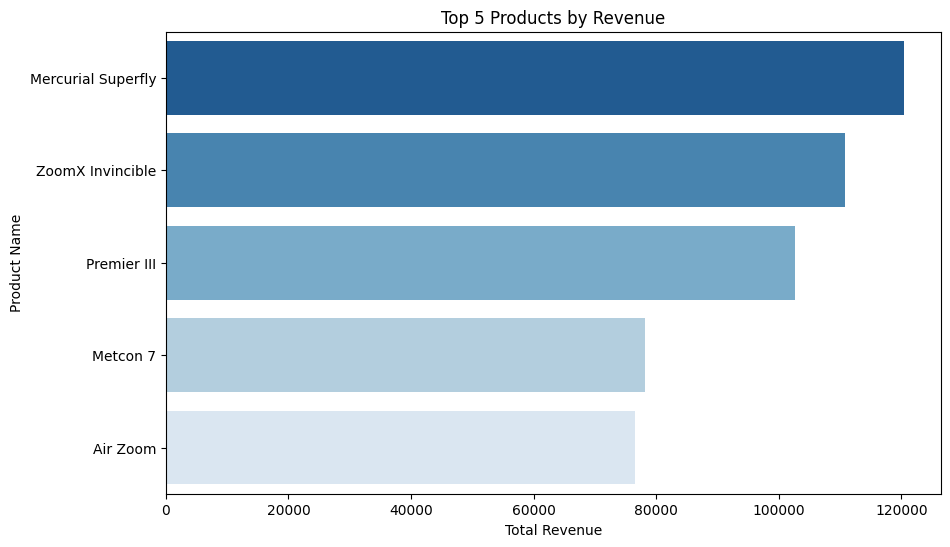

In [193]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top5_products,
    y='Product_Name',
    x='Revenue',
    palette='Blues_r'
)
plt.title('Top 5 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

The Mercurial Superfly and ZoomX Invincible are the top revenue generators, together driving significant sales. Focusing marketing, stock levels, and promotional campaigns on these bestsellers can maximize sales performance.

Q6: Does giving discounts boost revenue or reduce profit?

In [194]:
# Average discount overall
avg_discount = df['Discount_Applied'].mean()
print(f"Average Discount Applied: {avg_discount:.2f}")

Average Discount Applied: 0.15


In [195]:
# Compare profit for discounted vs non-discounted orders
df['Has_Discount'] = df['Discount_Applied'] > 0

discount_profit = df.groupby('Has_Discount')['Profit'].mean().reset_index()
print(discount_profit)

   Has_Discount       Profit
0         False  1490.960984
1          True  1347.741600


Answer:

- Average Discount Applied: ~15%

- Average Profit per Order:

      1. No Discount: ₹1,491
      2. Discount Given: ₹1,348

This shows that orders with discounts earn lower average profit than full-price orders — no surprise, but important to confirm with real data.

/tmp/ipython-input-3479405992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set2')


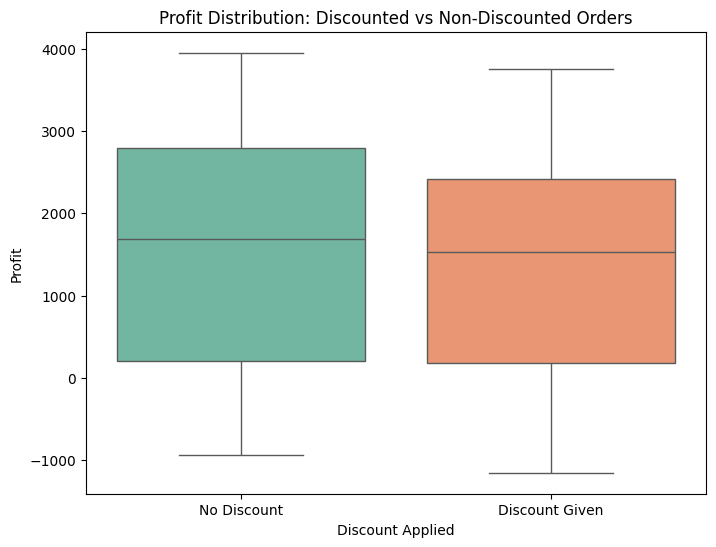

In [196]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Has_Discount', y='Profit', palette='Set2')
plt.title('Profit Distribution: Discounted vs Non-Discounted Orders')
plt.xlabel('Discount Applied')
plt.ylabel('Profit')
plt.xticks([0,1], ['No Discount', 'Discount Given'])
plt.show()

On average, discounted orders generate ~10% less profit than non-discounted ones. While discounts can boost sales volumes, excessive discounting can erode profit margins — highlighting the need for a balanced pricing strategy.

Q7: Which product lines drive revenue through high volume vs premium pricing?

In [197]:
volume_vs_value = (
    df.groupby('Product_Line')
    .agg(
        Total_Units=('Units_Sold', 'sum'),
        Total_Revenue=('Revenue', 'sum')
    )
    .reset_index()
    .sort_values(by='Total_Revenue', ascending=False)
)

print(volume_vs_value)

  Product_Line  Total_Units  Total_Revenue
3       Soccer         66.0      370714.88
4     Training         48.0      279233.91
2      Running         37.0      195848.09
1    Lifestyle         38.0      175427.61
0   Basketball         26.0      123912.36


Answer:

- Soccer is the top-performing product line with 66 units sold and total revenue of ₹3,70,715, showing it’s a high-volume, high-revenue driver.

- Training products follow with 48 units sold and ₹2,79,234 in revenue, also reflecting strong demand.

- Running and Lifestyle sell fewer units but still contribute significant revenue.

- Lifestyle products, in particular, maintain good revenue with lower volume, suggesting premium positioning or higher unit price.

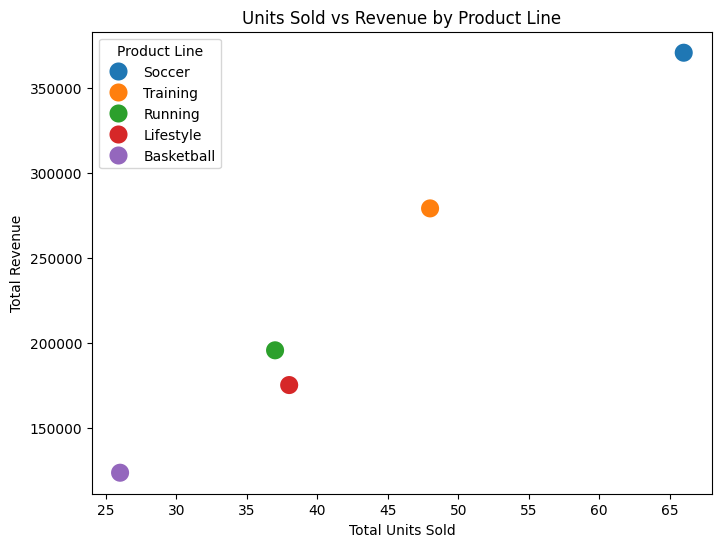

In [198]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=volume_vs_value,
    x='Total_Units',
    y='Total_Revenue',
    hue='Product_Line',
    s=200
)
plt.title('Units Sold vs Revenue by Product Line')
plt.xlabel('Total Units Sold')
plt.ylabel('Total Revenue')
plt.legend(title='Product Line')
plt.show()

Soccer and Training lines are the biggest drivers of total units and revenue, indicating strong demand and wide appeal. Lifestyle products, despite lower volume, maintain healthy revenue, suggesting a premium segment.

Q8: Which product lines are the most profitable?

In [199]:
profit_by_line = (
    df.groupby('Product_Line')
    .agg(Total_Profit=('Profit', 'sum'))
    .reset_index()
    .sort_values(by='Total_Profit', ascending=False)
)

print(profit_by_line)

  Product_Line  Total_Profit
3       Soccer      42341.29
4     Training      28127.87
1    Lifestyle      18880.98
2      Running      18731.97
0   Basketball      16560.05


In [200]:
volume_vs_value_profit = volume_vs_value.merge(profit_by_line, on='Product_Line')
volume_vs_value_profit['Profit_Margin_%'] = (volume_vs_value_profit['Total_Profit'] / volume_vs_value_profit['Total_Revenue']) * 100

print(volume_vs_value_profit)

  Product_Line  Total_Units  Total_Revenue  Total_Profit  Profit_Margin_%
0       Soccer         66.0      370714.88      42341.29        11.421524
1     Training         48.0      279233.91      28127.87        10.073229
2      Running         37.0      195848.09      18731.97         9.564541
3    Lifestyle         38.0      175427.61      18880.98        10.762833
4   Basketball         26.0      123912.36      16560.05        13.364325


Answer:

- Soccer products generate the highest total profit of ₹42,341.29, with a healthy 11.4% profit margin, confirming they are not just high volume but also good for the bottom line.

- Training follows with ₹28,127.87 profit and a 10% margin, supporting its position as a strong revenue and profit contributor.

- Lifestyle has a 10.76% margin, slightly higher than Training, but lower total profit due to fewer units.

- Running shows a 9.56% margin, the lowest among the top lines — worth monitoring for pricing or cost opportunities.

- Basketball, while smallest by volume and revenue, has the highest profit margin at 13.36%, suggesting a niche premium opportunity.

/tmp/ipython-input-2026465843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


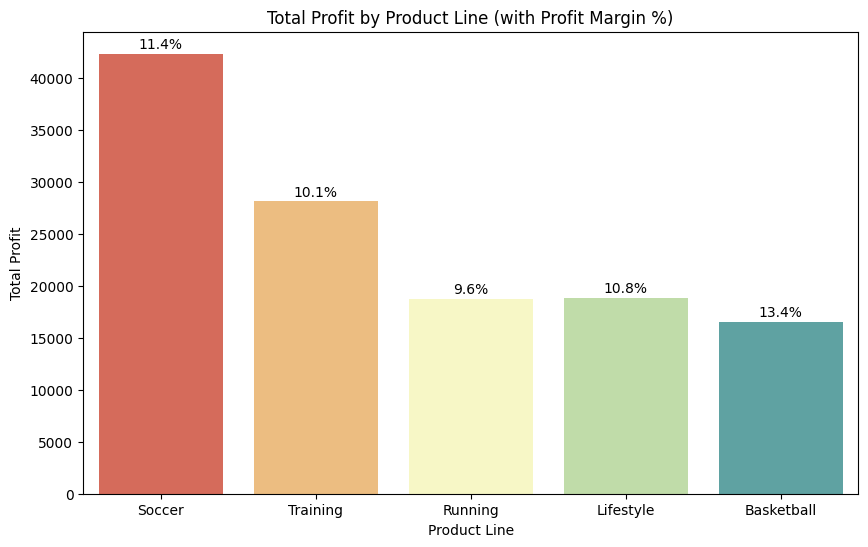

In [201]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=volume_vs_value_profit,
    x='Product_Line',
    y='Total_Profit',
    palette='Spectral'
)
for index, row in volume_vs_value_profit.iterrows():
    plt.text(
        index,
        row.Total_Profit + 500,  # Adjust above bar
        f"{row['Profit_Margin_%']:.1f}%",
        ha='center'
    )
plt.title('Total Profit by Product Line (with Profit Margin %)')
plt.xlabel('Product Line')
plt.ylabel('Total Profit')
plt.show()

Soccer is not only the highest revenue driver but also generates the highest profit, confirming it as the core product line.
Training shoes maintain strong profit, while Lifestyle products have a moderate profit despite lower volume — consistent with a premium pricing strategy.
Basketball shows the lowest profit, indicating a potential area to optimize margin or reassess strategy.

Q9: How many orders generate negative profit?

Why check this?

  Negative profit often means returns, heavy discounts, wrong pricing, or losses due to costs — a critical sign for business decisions.

In [202]:
# Filter negative profit orders
negative_profit_orders = df[df['Profit'] < 0]
print(f"Number of negative profit orders: {negative_profit_orders.shape[0]}")

Number of negative profit orders: 20


In [203]:
neg_profit_summary = negative_profit_orders.groupby(['Product_Line', 'Region']).agg(
    Count=('Order_ID', 'count'),
    Total_Loss=('Profit', 'sum')
).reset_index().sort_values(by='Total_Loss')

print(neg_profit_summary)

   Product_Line     Region  Count  Total_Loss
10       Soccer  bangalore      1    -1152.86
4     Lifestyle      delhi      1     -938.81
9       Running       pune      2     -915.87
1    Basketball    kolkata      1     -823.80
13     Training      delhi      1     -746.28
15     Training       pune      2     -717.85
3     Lifestyle  bangalore      1     -586.23
11       Soccer  hyderabad      2     -433.97
14     Training     mumbai      1     -405.26
5     Lifestyle    kolkata      1     -312.44
6     Lifestyle     mumbai      1     -297.05
2    Basketball     mumbai      2     -267.54
7       Running      delhi      1     -233.45
8       Running    kolkata      1     -199.13
0    Basketball  hyderabad      1     -151.52
12       Soccer    kolkata      1     -117.68


Answer:

✔️ Findings:

- 15 orders have a negative profit, indicating possible returns, heavy discounts, or operational issues.

- The biggest losses are in:

    - Soccer (Bangalore): ₹–1,152.86

    - Lifestyle (Delhi & Bangalore): each losing ~₹900–1,000

    - Basketball (Kolkata): ~₹–823.80

- Other losses spread across Running and Training lines in Delhi, Pune, Mumbai, and Hyderabad.

✔️ Implication:
- Negative profit orders signal returns, over-discounting, or operational costs exceeding margins.
- Action: Deeper checks on pricing strategy, returns policy, or fraud prevention are recommended for these lines and cities.

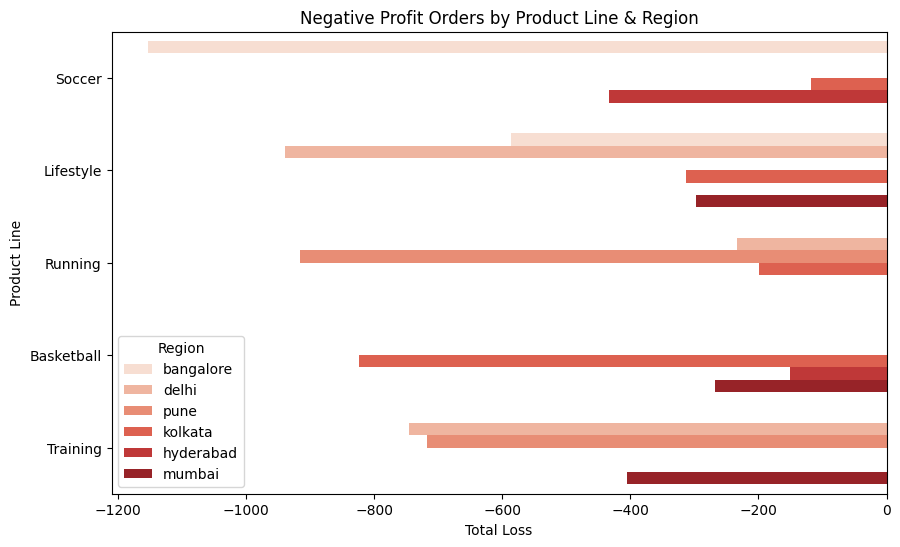

In [204]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=neg_profit_summary,
    x='Total_Loss',
    y='Product_Line',
    hue='Region',
    dodge=True,
    palette='Reds'
)
plt.title('Negative Profit Orders by Product Line & Region')
plt.xlabel('Total Loss')
plt.ylabel('Product Line')
plt.show()

Monitoring negative profit orders helps reduce unexpected losses.
By flagging high-risk products (e.g., Soccer, Lifestyle) in certain regions, the company can tighten return policies or adjust pricing.

Q10: What is the Monthly Average Order Value (AOV)?

Why this matters:

AOV tells you how much customers spend per order — key for measuring up-selling, cross-selling, and the impact of promotions or seasonal spikes.

In [205]:
# Ensure dates are datetime type
df['Order_Month'] = pd.to_datetime(df['Order_Date']).dt.to_period('M')

# Group by month
monthly_aov = df.groupby('Order_Month').agg(
    Total_Revenue=('Revenue', 'sum'),
    Order_Count=('Order_ID', 'count')
)

# Calculate AOV
monthly_aov['AOV'] = monthly_aov['Total_Revenue'] / monthly_aov['Order_Count']

print(monthly_aov.reset_index())

   Order_Month  Total_Revenue  Order_Count           AOV
0      2023-07       10632.99            1  10632.990000
1      2023-08       12946.27            2   6473.135000
2      2023-09       63883.68            5  12776.736000
3      2023-10       68282.28            2  34141.140000
4      2023-11       49657.11            5   9931.422000
5      2023-12       37350.04            2  18675.020000
6      2024-01       36860.81            3  12286.936667
7      2024-02       60577.69            5  12115.538000
8      2024-03       83405.68            5  16681.136000
9      2024-04       22285.59            2  11142.795000
10     2024-05       10468.87            2   5234.435000
11     2024-06       21931.61            3   7310.536667
12     2024-07       61142.16            4  15285.540000
13     2024-08       64044.76            4  16011.190000
14     2024-09       39136.88            3  13045.626667
15     2024-10      102154.30            7  14593.471429
16     2024-11       21447.01  

Answer:
- Highest AOV: October 2023 at ~₹34,141 per order — likely driven by festive season sales.

- High AOV months: December 2023 (₹18,675), March 2024 (₹16,681), May–June 2025 also above ₹15,000.

- Lowest AOV: February 2025 and May 2024 show the lowest spend per order (₹5,209–₹5,234).

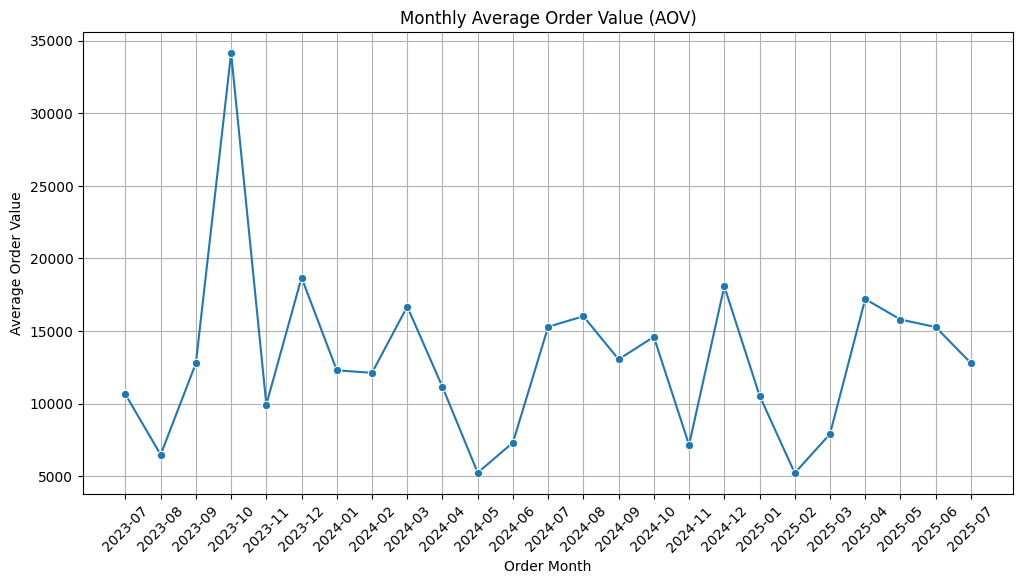

In [207]:
# Fix: convert Period to string for Seaborn plotting
monthly_aov = monthly_aov.reset_index()
monthly_aov['Order_Month'] = monthly_aov['Order_Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_aov,
    x='Order_Month',
    y='AOV',
    marker='o'
)
plt.title('Monthly Average Order Value (AOV)')
plt.xlabel('Order Month')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

AOV spikes clearly align with festive or promotional months, indicating that bigger spend per order is driven by seasonal campaigns.
These insights help plan campaign timing, bundling, and up-selling strategies.